In [2]:
'''
Put description + links to sources here  
https://earlyprint.org/jupyterbook/supervised.html 
https://www.geeksforgeeks.org/one-vs-rest-strategy-for-multi-class-classification/ 
http://scikit.ml/userguide.html 

'''
import pandas as pd
import numpy as np
from functions import getTexts,keywords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
fileinfo = getTexts("/srv/data/targetCorporaCorrected")
tfidf = TfidfVectorizer(min_df=2, sublinear_tf=True)
results = tfidf.fit_transform(fileinfo[0])
readable_results = pd.DataFrame(results.toarray(), index=fileinfo[1], columns=tfidf.get_feature_names_out())

In [4]:

targets=[]
missing = ['A10419', 'A10426', 'A58086', 'A80618', 'A34698', 'A34686', 'B20731', 'A19579', 'A68060', 'A43506', 'A57390', 'A70377', 'A86305', 'A91917', 'B14007', 'B24138', 'B24137', 'A09573', 'A15796', 'A08092']
kwdict = keywords('/srv/data/metadata/tuning/spreadsheet.csv')
kwdict.update(keywords('/srv/data/metadata/tuning/people.csv'))
kwdict.update(keywords('/srv/data/metadata/tuning/EPtuning.csv'))
kwdict.update(keywords('/srv/data/metadata/tuning/keywords.csv'))
for filekey in kwdict.keys():
    if filekey not in missing: 
        kw = kwdict[filekey][0]
        levant_terms = ['Turkey', 'Sultan of the Turks', 'Mediterranean Sea', 'Süleyman','Harem',
                        'Wars with Persia','Iran','Osman']
        eastind_terms = ['East India Company', 'East Indies','India','Indonesia']
        virginia_terms = ['Virginia', 'Virginia Company of London','Guyana',
                        'Bermuda Islands','Smith Thomas','Raleigh Walter',
                        "Raleigh's Roanoke colonies",'Pocahontas d','Gilbert Humphrey','Guiana']
        religion = ['Church of England','God','Providence and government of God',
                    "Apostles' Creed",'Christians', 'Church history', 'Christianity', 
                    'Christianity and other religions','Chronology Historical', 'Holidays', 
                    'Fasts and feasts', 'Judaism','Demoniac possession','Church history', 
                    'Christian martyrs', 'Persecution','Catholic Church','Jesus Christ',
                    'Monastic and religious life','Reformation', 'Bible']
        if any(k in levant_terms for k in kw): targets.append('Levant')
        elif any(k in eastind_terms for k in kw): targets.append('East India')
        elif any(k in virginia_terms for k in kw): targets.append('Virginia')
        elif any(k in religion for k in kw): targets.append('Religion')
        else: targets.append('Other')

SVC ovr
Test Set Accuracy : 0.6753246753246753
Counter({'Other': 260, 'Religion': 68, 'Virginia': 25, 'Levant': 19, 'East India': 13})
Counter({'Other': 385})


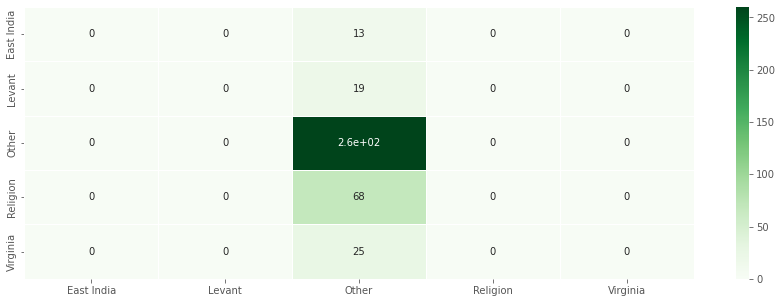

In [7]:
X_train, X_test, y_train, y_test = train_test_split(readable_results, targets, test_size=0.45, random_state=42)

name = 'Logit ovr'
        # 'SVC ovr'
        # 'Logit ovo' 
        # 'SVC ovo'

classifier = OneVsRestClassifier(LogisticRegression())
    # SVC(decision_function_shape='ovr') #2 minutes 
    # OneVsOneClassifier(LogisticRegression())
    # OneVsOneClassifier(SVC()) 

print(name)
clf = classifier.fit(X_train, y_train)
score = clf.score(X_test, y_test)
prediction = clf.predict(X_test)
print(f"Test Set Accuracy : {accuracy_score(y_test, prediction)}")
# print("TCP ID | Actual Category | Predicted Category")
reals, pred = [],[]
for title, real, predicted in zip(X_test.index, y_test, prediction):
    # print(f"{title} | {real} | {predicted}")
    reals.append(real)
    pred.append(predicted)
# print("Cross validation score:", np.mean(cross_val_score(model, readable_results, targets, cv=5)))
cm = confusion_matrix(y_test,prediction)
cm_df = pd.DataFrame(cm, columns=clf.classes_, index=clf.classes_)
f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(cm_df,annot=True,cmap='Greens',linewidths=.5)
# print(classification_report(y_test, prediction, target_names=clf.classes_))
# print(f"Classification Report : \n\n{classification_report(y_test, prediction)}")
from collections import Counter 
print(Counter(reals))
print(Counter(pred))
